## CSC 578 HW\#7 Intel Image Classification Competition (Fall 2023)

### Name: Megh Thakkar



In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import os
os.environ['TF_DISABLE_META_OPTIMIZER'] = '1'


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the training data. Split into training 80% and validation 20%.

In [2]:
train_directory = '../input/csc-578-hw7-fall-2023/train'

img_height = 150
img_width = 150

train_dataset, valid_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',        # use names of subdirectories as target labels
    label_mode='categorical', # convert target class (int) to one-hot-vector
    validation_split=0.2,
    subset="both",
    seed=123,                 # use same random seed with valid_set
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
)

Found 13986 files belonging to 6 classes.
Using 11189 files for training.
Using 2797 files for validation.


In [3]:
for images, _ in train_dataset.take(1):
    print(images.shape)
for images, _ in valid_dataset.take(1):
    print(images.shape)

(32, 150, 150, 3)
(32, 150, 150, 3)


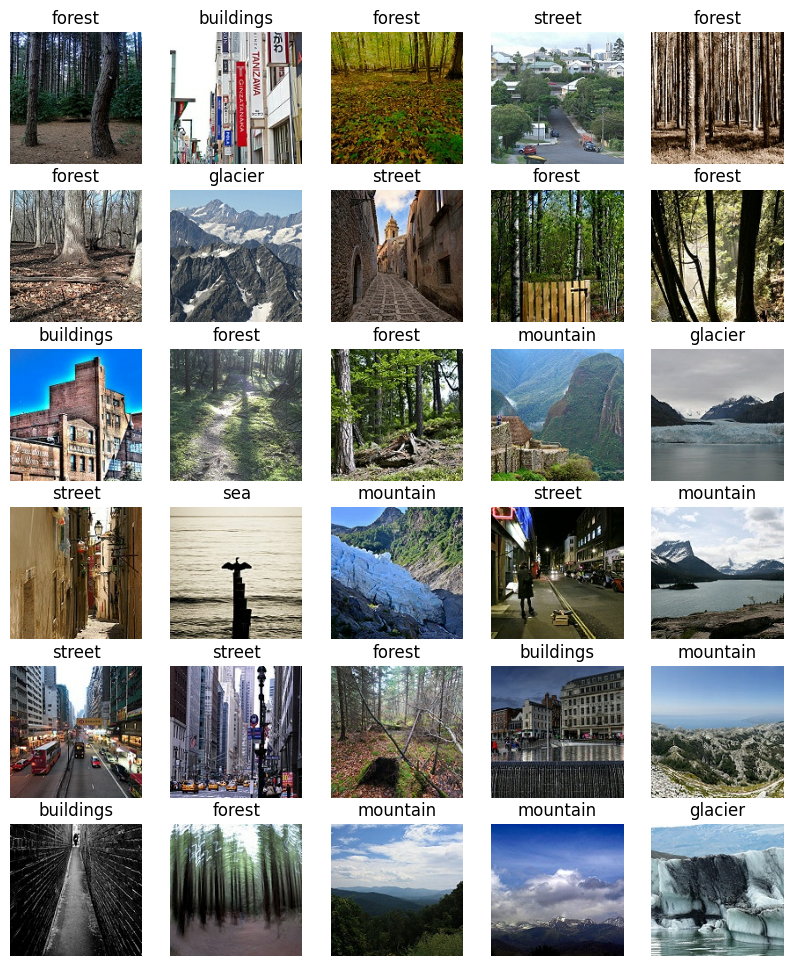

In [4]:
# Visualize some training examples.
plt.figure(figsize=(10, 12))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    for i in range(30):
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

### Define a model.

In [5]:

'''
# A relatively simple CNN model
model = keras.Sequential()

model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(keras.layers.Conv2D(64, (5,5), activation = 'relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(keras.layers.Conv2D(128, (5,5), activation = 'relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(2,2))
model.add(Dropout(0.5))



model.add(keras.layers.Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])
              
'''

"\n# A relatively simple CNN model\nmodel = keras.Sequential()\n\nmodel.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))\n\nmodel.add(keras.layers.Conv2D(16, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))\nmodel.add(BatchNormalization())\nmodel.add(keras.layers.MaxPooling2D(2,2))\nmodel.add(Dropout(0.25))\n\nmodel.add(keras.layers.Conv2D(32, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))\nmodel.add(BatchNormalization())\nmodel.add(keras.layers.MaxPooling2D(2,2))\nmodel.add(Dropout(0.25))\n\nmodel.add(keras.layers.Conv2D(64, (5,5), activation = 'relu',kernel_regularizer=l2(0.001)))\nmodel.add(BatchNormalization())\nmodel.add(keras.layers.MaxPooling2D(2,2))\nmodel.add(Dropout(0.5))\n\nmodel.add(keras.layers.Conv2D(128, (5,5), activation = 'relu',kernel_regularizer=l2(0.001)))\nmodel.add(BatchNormalization())\nmodel.add(keras.layers.MaxPooling2D(2,2))\nmodel.add(Dropout(0.5))\n\n\n\nmodel.add(keras.layers.Flatten())\n\nmodel.add(Dense(128, a

In [6]:
'''newmodel = keras.Sequential()

newmodel.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

newmodel.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
newmodel.add(BatchNormalization())
newmodel.add(keras.layers.MaxPooling2D(2, 2))

newmodel.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
newmodel.add(BatchNormalization())
newmodel.add(keras.layers.MaxPooling2D(2, 2))

newmodel.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
newmodel.add(BatchNormalization())
newmodel.add(keras.layers.MaxPooling2D(2, 2))

newmodel.add(keras.layers.Flatten())

newmodel.add(Dense(128, activation='relu'))
newmodel.add(Dropout(0.5))

# The last layer is the output layer with softmax activation since this is a multi-class classification problem.
# There should be no Dropout layer after this point.
newmodel.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate=0.001)  # set learning rate (same as default for now)
newmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
'''

"newmodel = keras.Sequential()\n\nnewmodel.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))\n\nnewmodel.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))\nnewmodel.add(BatchNormalization())\nnewmodel.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))\nnewmodel.add(BatchNormalization())\nnewmodel.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))\nnewmodel.add(BatchNormalization())\nnewmodel.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel.add(keras.layers.Flatten())\n\nnewmodel.add(Dense(128, activation='relu'))\nnewmodel.add(Dropout(0.5))\n\n# The last layer is the output layer with softmax activation since this is a multi-class classification problem.\n# There should be no Dropout layer after this point.\nnewm

In [7]:
'''
newmodel1 = keras.Sequential()

newmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

newmodel1.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Flatten())

newmodel1.add(Dense(128, activation='relu'))
newmodel1.add(Dropout(0.5))

# The last layer is the output layer with softmax activation since this is a multi-class classification problem.
# There should be no Dropout layer after this point.
newmodel1.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate=0.001)  # set learning rate (same as default for now)
newmodel1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
'''

"\nnewmodel1 = keras.Sequential()\n\nnewmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Flatten())\n\nnewmodel1.add(Dense(128, activation='relu'))\nnewmodel1.add(Dropout(0.5))\n\n# The last layer is the output layer with softmax activation since this is a multi-class classification problem.\n# There should be no Dropout layer after this point.\nnewmodel1.add(keras.layers.Dense(6, activation='softmax'))\n\n# Compile your m

In [8]:
'''newmodel1 = keras.Sequential()

newmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))


newmodel1.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))



newmodel1.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))



newmodel1.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))



newmodel1.add(keras.layers.Flatten())
newmodel1.add(Dense(128, activation='relu'))
newmodel1.add(Dropout(0.5))  # Existing Dropout layer


newmodel1.add(keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.001)
newmodel1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
'''

"newmodel1 = keras.Sequential()\n\nnewmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))\n\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\n\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\n\n\nnewmodel1.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\n\n\nnewmodel1.add(keras.layers.Flatten())\nnewmodel1.add(Dense(128, activation='relu'))\nnewmodel1.add(Dropout(0.5))  # Existing Dropout layer\n\n\nnewmodel1.add(keras.layers.Dense(6, activation='softmax'))\n\nopt = Adam(learning_rate=0.001)\nnewmodel1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])\n"

In [9]:
'''newmodel1 = keras.Sequential()

newmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))



newmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(32, (5, 5),kernel_regularizer=regularizers.L1(1e-4), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(32, (5, 5),kernel_regularizer=regularizers.L1(1e-4), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(64, (7, 7),kernel_regularizer=regularizers.L1(1e-4), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(64, (7, 7),kernel_regularizer=regularizers.L1(1e-4), padding='same', activation='relu'))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))


newmodel1.add(keras.layers.Flatten())
newmodel1.add(Dense(128, activation='relu'))
newmodel1.add(Dropout(0.2))  # Existing Dropout layer


newmodel1.add(keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.001)
newmodel1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
'''

"newmodel1 = keras.Sequential()\n\nnewmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))\n\n\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(32, (5, 5),kernel_regularizer=regularizers.L1(1e-4), padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(32, (5, 5),kernel_regularizer=regularizers.L1(1e-4), padding='same', activation='relu'))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(64, (7, 7),kernel_regularizer=regularizers.L1(1e-4), padding='same', activatio

In [10]:
'''
newmodel1 = keras.Sequential()

newmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

newmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.00001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.00001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.00001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.00001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))



newmodel1.add(keras.layers.Flatten())
newmodel1.add(Dense(128, activation='relu'))
newmodel1.add(Dropout(0.2))  # Existing Dropout layer


newmodel1.add(keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.001)
newmodel1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#final model for score of 1.0866568 BASELINE


'''

"\nnewmodel1 = keras.Sequential()\n\nnewmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.00001)))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.00001)))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.00001)))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.00001)))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\n\n\nnewmodel1.add(keras.layers.Flatten())\nnewmodel1.add(Dense(128, acti

In [11]:
newmodel1 = keras.Sequential()

newmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

newmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.0001)))
newmodel1.add(BatchNormalization())


newmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.0001)))
newmodel1.add(BatchNormalization())



newmodel1.add(keras.layers.Conv2D(16, (5, 5),padding='same', activation='relu',kernel_regularizer=l2(0.0001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))


newmodel1.add(keras.layers.Conv2D(16, (5, 5),padding='same', activation='relu',kernel_regularizer=l2(0.0001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.0001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))


newmodel1.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.0001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.0001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.0001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Flatten())
newmodel1.add(Dense(128, activation='relu'))
newmodel1.add(Dropout(0.45))  


newmodel1.add(keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.001)
newmodel1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



#final model above SANDBOX


In [12]:
'''
newmodel1 = keras.Sequential()

newmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

newmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.000001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.000001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))


newmodel1.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',kernel_regularizer=l2(0.000001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.000001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))


newmodel1.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.000001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))

newmodel1.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.000001)))
newmodel1.add(BatchNormalization())
newmodel1.add(keras.layers.MaxPooling2D(2, 2))


newmodel1.add(keras.layers.Flatten())
newmodel1.add(Dense(128, activation='relu'))
newmodel1.add(Dropout(0.5))  


newmodel1.add(keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.001)
newmodel1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



#final model above SANDBOX
'''

"\nnewmodel1 = keras.Sequential()\n\nnewmodel1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.000001)))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=l2(0.000001)))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\n\nnewmodel1.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',kernel_regularizer=l2(0.000001)))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\nnewmodel1.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.000001)))\nnewmodel1.add(BatchNormalization())\nnewmodel1.add(keras.layers.MaxPooling2D(2, 2))\n\n\nnewmodel1.add(keras.layers.Conv2D(64, (3, 3), padding='same', act

In [13]:
# Print model summary to ensure
newmodel1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 16)      6

In [14]:
# Fit the model.  We train for 3 epochs for now.
#history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

In [15]:
# Fit the model.  We train for 3 epochs for now.
batch_size = 64
newhistory = newmodel1.fit(train_dataset, epochs=5,batch_size=batch_size,  validation_data=valid_dataset)

Epoch 1/5
350/350 [==============================] - 36s 56ms/step - loss: 1.0635 - accuracy: 0.6155 - val_loss: 2.1909 - val_accuracy: 0.3268
Epoch 2/5
350/350 [==============================] - 16s 45ms/step - loss: 0.6858 - accuracy: 0.7618 - val_loss: 0.6284 - val_accuracy: 0.7862
Epoch 3/5
350/350 [==============================] - 16s 44ms/step - loss: 0.5642 - accuracy: 0.8044 - val_loss: 0.5213 - val_accuracy: 0.8230
Epoch 4/5
350/350 [==============================] - 16s 45ms/step - loss: 0.5208 - accuracy: 0.8232 - val_loss: 0.6933 - val_accuracy: 0.7665
Epoch 5/5
350/350 [==============================] - 16s 45ms/step - loss: 0.4835 - accuracy: 0.8390 - val_loss: 0.5140 - val_accuracy: 0.8273


### Visualize Training (accuracy and loss)

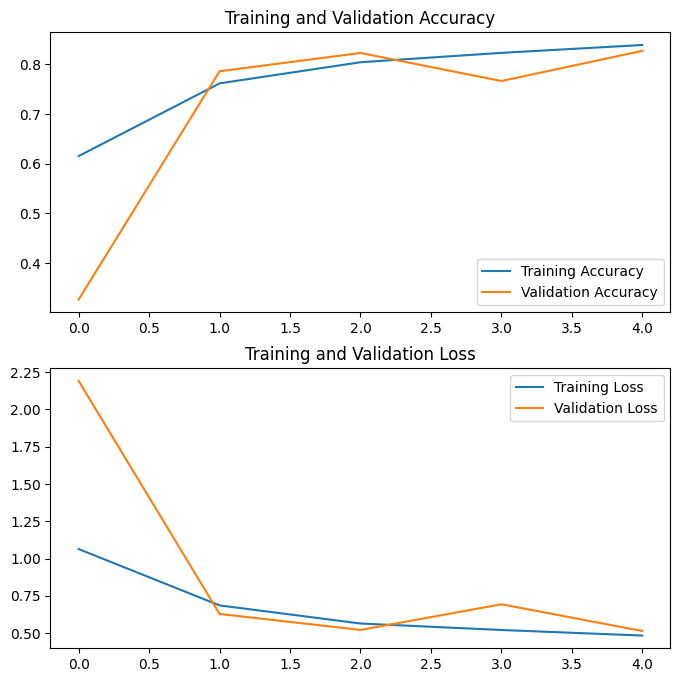

In [16]:
acc = newhistory.history['accuracy']
val_acc = newhistory.history['val_accuracy']

loss = newhistory.history['loss']
val_loss = newhistory.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Examine the results for some validation examples.

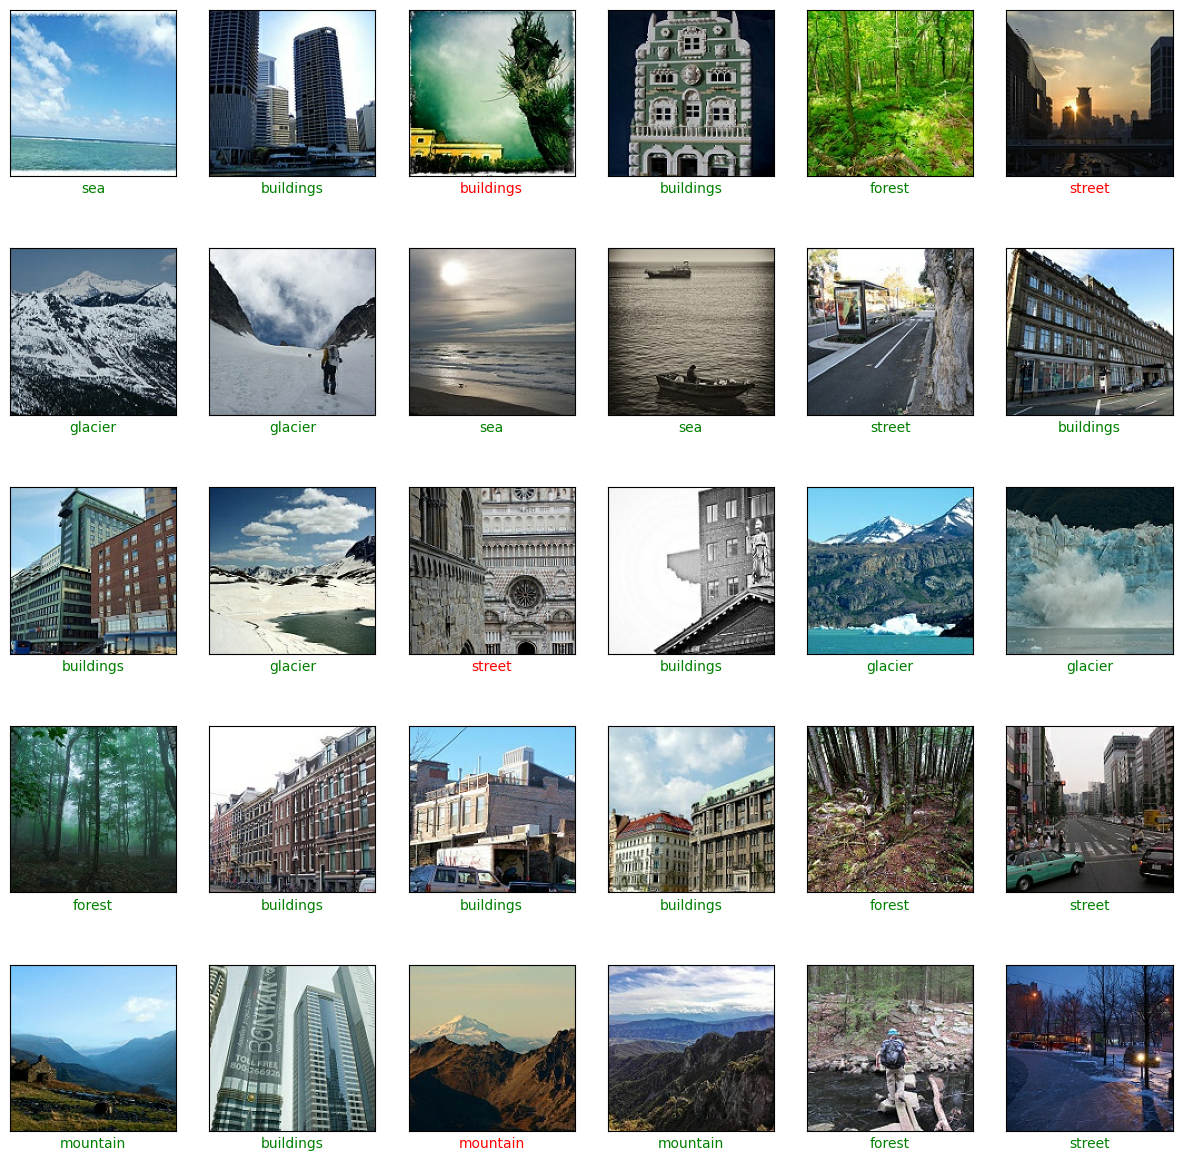

In [17]:
#Visualize 30 of the predicted data with green label for correct predictions
#and red label vise versa.
plt.figure(figsize=(15,15))
for images, labels in valid_dataset.take(1):
    for i in range(30):
        prediction = newmodel1.predict(images[i].numpy().reshape(1,img_height, img_width,3), verbose=0)
        plt.subplot(5, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.grid(False)
        xlabel = plt.xlabel(class_names[prediction.argmax()])
        if (prediction.argmax() == labels[i].numpy().argmax()):
            xlabel.set_color("green")
        else:
            xlabel.set_color("red")
plt.show()

### Make Predictions for Test_Pred data.  
#### Note: Results are stored in a dictionary, which is keyed by file numbers (as integers).

In [18]:
# Load the test_pred data (which has no target labels)
import os
import cv2

pred_directory = '../input/csc-578-hw7-fall-2023/test_pred'
result_dict = {} # dictionary to store predictions (keyed by file number)

print ("predicting for testset...")
# iterate over files in that directory
for filename in os.listdir(pred_directory):
    f = os.path.join(pred_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        fnum = int(filename[:-4]) # filename e.g. '103.jpg" -> 103
        img = cv2.imread(f)
        ### 11/3/2023 update -- NO further image normalization is necessary for the test data.
        ### img = img/255.0
        img = img.reshape(-1,img_height, img_width,3)
        pred = newmodel1.predict(img, verbose=0)
        result_dict[fnum] = pred[0]  # [0] because there is only one data
print (f'  -- done, {len(result_dict)} test instances predicted.')


import pandas as pd
data = pd.DataFrame(result_dict).T
data.columns = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
data.index = data.index.astype(int)  # Convert index to int
data.index.name = 'fnum'  # Name the index for clarity
data.reset_index(inplace=True)  # Reset index to turn it into a column


data.sort_values(by='fnum', inplace=True)


data.to_csv('submission.csv', index=False)


predicting for testset...
  -- done, 2993 test instances predicted.


In [19]:
data = pd.read_csv('submission.csv')
print(data)

       fnum  buildings    forest   glacier  mountain       sea    street
0     20056   0.000007  0.976834  0.002126  0.000002  0.000311  0.020720
1     20057   0.996343  0.000037  0.000099  0.001013  0.000914  0.001594
2     20058   0.000011  0.000016  0.004222  0.004875  0.990861  0.000016
3     20059   0.003381  0.001256  0.783770  0.016425  0.186856  0.008312
4     20060   0.095983  0.004245  0.002028  0.001066  0.010961  0.885717
...     ...        ...       ...       ...       ...       ...       ...
2988  24325   0.000022  0.000012  0.021996  0.027429  0.950536  0.000004
2989  24328   0.001140  0.000109  0.061955  0.805532  0.131241  0.000023
2990  24329   0.007094  0.004416  0.159284  0.662597  0.166205  0.000403
2991  24332   0.002676  0.021076  0.007943  0.000131  0.000189  0.967985
2992  24334   0.000275  0.000063  0.793418  0.169333  0.036779  0.000132

[2993 rows x 7 columns]


In [20]:
import os


# Define the path for the submission CSV file
# If you need to save it in the current working directory, just use the filename
submission_csv_path = os.path.join(os.getcwd(), 'submission.csv')  # Saves in the current working directory

# Save the DataFrame to a CSV file without the index
data.to_csv(submission_csv_path, index=False, float_format='%.5f')

# Check if the file was created
if os.path.isfile(submission_csv_path):
    print(f"Submission CSV file successfully created at {submission_csv_path}")
else:
    print(f"Failed to create the submission CSV file at {submission_csv_path}")

# Additional check for the current working directory
print(f"The current working directory is: {os.getcwd()}")


Submission CSV file successfully created at /kaggle/working/submission.csv
The current working directory is: /kaggle/working


## (!!) Write the rest of the code by yourself.
### You must write the submission file, where the entries are sorted by the file number.